C:\Users\Lahari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lahari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lahari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lahari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

DB Index: 0.767475104291682


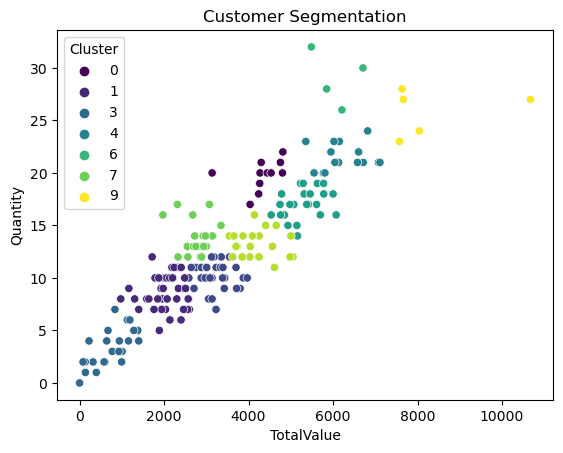

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

customers = pd.read_csv("C:/Users/Lahari/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/Lahari/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/Lahari/Downloads/Transactions.csv")
#Customer Segmentation
features = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
data = customers.merge(features, on='CustomerID', how='left').fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TotalValue', 'Quantity']])

inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

optimal_clusters = k_values[np.argmin(inertia)]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f"DB Index: {db_index}")

sns.scatterplot(x=data['TotalValue'], y=data['Quantity'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()

# Save Clustering Results
data[['CustomerID', 'Cluster']].to_csv('Clustering.csv', index=False)

